<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic17/3_Intro_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

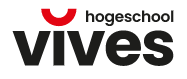<br>


**DEEP LEARNING**<br>
Academiejaar 2024-2025<br>
Andy Louwyck

---



---



# **INTRODUCTION TO LANGCHAIN**

[LangChain](https://www.langchain.com/) is a framework designed to simplify the creation of applications using large language models (LLMs). As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.

This notebook introduces key LangChain concepts and demonstrates their application in building a simple LLM application and a basic chatbot. Before diving into the code, it is explained what LangChain is.

## **What is LangChain?**

Langchain is a comprehensive library designed for creating complex interaction flows with LLMs. It enables the development of applications that interact with LLMs and other data sources, providing superior capabilities compared to simple single-prompt applications.



The key features of Langchain are:

1. **Chains**: Chains are critical in LangChain for composing modular components into reusable pipelines. In fact, they are sequences of calls to components, which can include other chains. They are necessary for more complex applications that require chaining LLMs with each other or with other components. Langchain provides a chain interface for such applications and offers different types of foundational chains.

2. **Agents**: Agents are a key feature in LangChain for creating systems that interact dynamically with users and environments over time. An agent is an autonomous software entity that is capable of taking actions to accomplish goals and tasks. They are entities that decide which sequence of actions to take based on user input. They use an LLM as a reasoning engine to determine these actions. Agents have access to a suite of tools and memory, allowing them to interact with the world and remember the context of the conversation.

3. **Memory**: In LangChain, memory refers to the persisting state between executions of a chain or agent. It allows agents to remember the context of the conversation. Langchain offers different types of memory, each with its own use cases and trade-offs. Each type of memory serves a specific purpose, from storing the immediate history of a conversation to extracting and summarizing entities from the conversation.

4. **Tools**: Tools provide modular interfaces for agents to integrate external services like databases and APIs. Toolkits group tools that share resources. Tools can be combined with models to extend
their capability. They perform specific duties and can be generic utilities, other chains, or even other agents. They allow the LLM to interact with the outside world and can be customized to perform any operation, not just predefined ones. LangChain offers tools like document loaders, indexes, and vector stores, which facilitate the retrieval and storage of data for augmenting data retrieval in LLMs.


Chains, agents, memory, and tools enable the creation of sophisticated LLM applications that go beyond basic API calls to a single LLM. Langchain also provides a *callback system* that allows users to hook into various stages of the LLM application, useful for tasks like logging, monitoring, and streaming. The library is highly customizable, allowing users to create complex networks by leveraging these features. It's used in projects that require complex tasks like writing SQL queries, fetching data from a database, analyzing the data, and providing a response in the form of an answer. All these tasks happen automatically from start to finish, making Langchain a powerful tool for developing GenAI applications.

## **Setup**

First we need to setup our Google Colab environment, starting with installing LangChain:

In [ ]:
!pip install -q langchain

We'll use the latest [mistral.ai](https://mistral.ai/) chat model:

In [ ]:
!pip install -qU langchain-mistralai

Of course, it is possible to use another LLM, such as one of OpenAI's [GPT](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer), Google's [Gemini](https://en.wikipedia.org/wiki/Gemini_(language_model)), Anthropic's [Claude](https://en.wikipedia.org/wiki/Claude_(language_model)), or Meta's [LLama](https://en.wikipedia.org/wiki/Llama_(language_model)) models. To see how you can setup another chat model, check https://python.langchain.com/v0.2/docs/tutorials/llm_chain/#setup.

It is highly recommended to add your API tokens for LangChain and Mistral to the Google Colab Secrets (left pain), and assign them to the following environment variables:

In [ ]:
import os
from google.colab import userdata

for token in ["LANGCHAIN_API_KEY", "MISTRAL_API_KEY"]:
    os.environ[token] = userdata.get(token)

We're ready now to explore LangChain!

## **LangChain Concepts**

In this section, we discuss the following LangChain concepts and techniques:

- Chat models
- Messages
- Output parsers
- Prompt templates
- Chat history
- Streaming

In the next sections, we'll apply these concepts and techniques to build a simple LLM application and basic chatbot.

An detailed overview of LangChain architecture, concepts, and techniques can be found here: https://python.langchain.com/v0.2/docs/concepts.

### Chat Models

Chat models are language models that use a sequence of messages as inputs and return chat messages as outputs. They support the assignment of distinct roles to conversation messages, helping to distinguish messages from the AI, users, and instructions such as system messages (see section about Messages).

As an example, let's import and instantiate the latest Mistral chat model:

In [ ]:
from langchain_mistralai import ChatMistralAI
model = ChatMistralAI(model="mistral-large-latest")
model

ChatMistralAI(client=<httpx.Client object at 0x7d6edc059a80>, async_client=<httpx.AsyncClient object at 0x7d6edc0581f0>, mistral_api_key=SecretStr('**********'), model='mistral-large-latest')

We can simply pass a string to the `invoke` method to prompt the model. The result is an `AIMessage` object. The answer is stored in attribute `content`:

In [ ]:
result = model.invoke("what is 2 + 2?")
print(type(result))
print()
print(result.content)

<class 'langchain_core.messages.ai.AIMessage'>

The answer to 2 + 2 is 4. This is a basic arithmetic operation in mathematics.


When a string is passed in as input, it is converted to a `HumanMessage` object, and then passed to the underlying model.

### Messages

A `HumanMessage` object is constructed as follows:

In [ ]:
from langchain_core.messages import HumanMessage

message = HumanMessage(content="what is 2 + 2?")
message

HumanMessage(content='what is 2 + 2?')

We pass the `HumanMessage` object to the `invoke` method. Actually, the method accepts a list of messages:

In [ ]:
print(model.invoke([message]).content)

The answer to 2 + 2 is 4. This is a basic arithmetic operation where you're adding two numbers together.


There's also `SystemMessage`, which tells the model how to behave:

In [ ]:
from langchain_core.messages import SystemMessage

result = model.invoke([
    SystemMessage('You have to explain each user question as if this user is a 6-year old child'),
    HumanMessage('Who is Alan Turing?')
])
result.content

"Sure, imagine you're playing with a box of Lego blocks. Now, you have a set of instructions that tell you exactly how to build a cool spaceship, right? Alan Turing was a very smart man who came up with the idea of a machine that could follow instructions, just like you with your Lego, but for any kind of job, not just building toys. This machine is what we now call a computer.\n\nAlan Turing also did some very important work during a big war. He helped to figure out secret messages that the bad guys were sending. By understanding these messages, he helped the good guys to win the war. So, Alan Turing was like a superhero who used his brain to do amazing things!"

Recall that the actual message is always stored in the `content` attribute.

### Output Parsers

In many cases it is more convenient to use an output parser to parse the `result` returned by the chat model. Here we're dealing with strings, so we instantiate a `StrOutputParser` and pass the `result` to its `invoke` method:

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()
parser.invoke(result)

"Sure, imagine you're playing with a box of Lego blocks. Now, you have a set of instructions that tell you exactly how to build a cool spaceship, right? Alan Turing was a very smart man who came up with the idea of a machine that could follow instructions, just like you with your Lego, but for any kind of job, not just building toys. This machine is what we now call a computer.\n\nAlan Turing also did some very important work during a big war. He helped to figure out secret messages that the bad guys were sending. By understanding these messages, he helped the good guys to win the war. So, Alan Turing was like a superhero who used his brain to do amazing things!"

In general, output parsers are responsible for taking the output of a model and transforming it to a more suitable format for downstream tasks, such as JSON, XML, YAML, CSV, or a Pandas DataFrame.

### Prompt Templates

Recall that a *prompt* is natural language text describing the task that a chat model should perform.

*Prompt templates* help to translate user input and parameters into instructions for a chat model. This can be used to guide a model's response, helping it understand the context, and generate relevant and coherent language-based output.

Prompt templates take as input a dictionary, where each key represents a variable in the prompt template to fill in, and they output a `PromptValue`, which can be cast to a string or a list of messages.

A `PromptTemplate` is used to format a single string. It is generally used for simpler inputs. For example, a common way to construct and use a PromptTemplate is as follows:

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("Tell me a joke about {topic}")
prompt = prompt_template.invoke({"topic": "cats"})
prompt.to_string()

'Tell me a joke about cats'

In [ ]:
prompt.to_messages()

[HumanMessage(content='Tell me a joke about cats')]

The string as well as the list of messages can be passed to the chat model:

In [ ]:
print(
    parser.invoke(
        model.invoke(prompt.to_messages())
    )
)

Sure, here's a light-hearted cat joke for you:

Why don't cats play poker in the jungle?

Because there's too many cheetahs!


It is, however, more convenient to use a `ChatPromptTemplate`. Using this template it is possible to format a list of messages. For example, a common way to construct and use a `ChatPromptTemplate` is as follows:

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant"),
    ("user", "Tell me a joke about {topic}")
])

prompt_template.invoke({"topic": "cats"}).to_messages()

[SystemMessage(content='You are a helpful assistant'),
 HumanMessage(content='Tell me a joke about cats')]

In [ ]:
print(
    parser.invoke(
        model.invoke(
            prompt_template.invoke({"topic": "AI"}).to_messages()
        )
    )
)

Why don't machines ever laugh at jokes?

Because they have a "hardware" time processing "humor" algorithms! They're always too "busy error-handling" to appreciate a good punchline!


Another example:

In [ ]:
prompt = ChatPromptTemplate.from_messages([
    ("system", "Answer the questions as if the user is {age} years old"),
    ("user", "Tell me who {person} is")
]).invoke(dict(age=10, person='Geoffry Hinton'))
prompt

ChatPromptValue(messages=[SystemMessage(content='Answer the questions as if the user is 10 years old'), HumanMessage(content='Tell me who Geoffry Hinton is')])

In [ ]:
parser.invoke(model.invoke(prompt.to_messages()))

'Sure, I\'d be happy to explain!\n\nGeoffrey Hinton is a very smart person, kind of like a superhero, but instead of fighting bad guys, he uses his brain to understand how our minds work. He\'s a scientist who specializes in something called "artificial intelligence" or "AI" for short. This is a field where scientists try to make computers think and learn like humans do.\n\nJust like how you learn from your teachers and parents, Geoffrey Hinton helped create something called "neural networks" which help computers learn from data. He\'s often called the "Godfather of Deep Learning" because he\'s been a big part of making AI what it is today. But don\'t worry, he doesn\'t have a fancy cape or anything like that, he just uses his knowledge and ideas to help make computers smarter!'

Recall that the process of structuring an instruction that can be interpreted and understood by a generative AI model is called *prompt engineering*.

### Chat History

Most LLM applications have a conversational interface. An essential component of a conversation is being able to refer to information introduced earlier in the conversation. At bare minimum, a conversational system should be able to access some window of past messages directly.

The concept of `ChatHistory` refers to a class in LangChain which can be used to wrap an arbitrary chain. This `ChatHistory` will keep track of inputs and outputs of the underlying chain, and append them as messages to a message database. Future interactions will then load those messages and pass them into the chain as part of the input.

This concept will be applied in the chatbot example.

### Streaming

A `ChatModel` implements a sync method called `stream` and an async variant called `astream`. These methods are designed to stream the final output in chunks, yielding each chunk as soon as it is available.

This technique will be demonstrated in the chatbot example.

## **Build a Simple LLM Application**

In previous section, we've already built a few simple LLM applications to explain some of the key LangChain concepts and techniques. In this section, we build an LLM application that will translate text from English into another language.

This is a relatively simple LLM application - it's just a single LLM call plus some prompting. What's new here is the use of LangChain Expression Language, or **LCEL**, a declarative way to chain LangChain components.

The example is adopted from the following LangChain quickstart: https://python.langchain.com/v0.2/docs/tutorials/llm_chain/



### Setup

We've already setup our environment, so we may skip this part of the tutorial.

If you want to trace the LLM application using *LangSmith*, then you need to set the following environment variable:

In [ ]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"

### Using Language Models

Let's re-import and re-instantiate the latest large MISTRAL model:

In [ ]:
from langchain_mistralai import ChatMistralAI

model = ChatMistralAI(model="mistral-large-latest")

LangChain supports many different language models that you can use interchangably. Check the tutorial to see how you can use other models such as GPT-4, Claude-3-Sonnet, or Gemini!

Let's first use the model directly. `ChatModel` instances are LangChain "Runnables", which implies they expose a standard interface for interacting with them. To just simply call the model, we can pass in a list of messages to the `invoke` method:

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="Translate the following from English into Italian"),
    HumanMessage(content="hi!"),
]

model.invoke(messages)

AIMessage(content='Hello! In Italian, this is commonly translated as "Ciao!" Please note that, like in English, "Ciao" can be used both for greeting someone and saying goodbye.', response_metadata={'token_usage': {'prompt_tokens': 15, 'total_tokens': 54, 'completion_tokens': 39}, 'model': 'mistral-large-latest', 'finish_reason': 'stop'}, id='run-918759f5-0971-4215-b909-be5e51f68bae-0', usage_metadata={'input_tokens': 15, 'output_tokens': 39, 'total_tokens': 54})

### Output Parsers

Notice that the response from the model is an `AIMessage`. This contains a string response along with other metadata about the response. Oftentimes we may just want to work with the string response. We can parse out just this response by using a simple output parser.

We first import the simple output parser. One way to use it is to use it by itself. For example, we could save the `result` of the language model call and then pass it to the `parser`:

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

result = model.invoke(messages)

print(parser.invoke(result))

Hello! In Italian, this is typically translated as "Ciao!"


More commonly, we can "chain" the model with this output parser. This means this output parser will get called every time in this chain. This chain takes on the input type of the language model (string or list of message) and returns the output type of the output parser (string).

We can easily create the chain using the `|` operator, which is used in LangChain to combine two elements together:

In [ ]:
chain = model | parser
print(chain.invoke(messages))

Hello! In Italian, this is typically translated as "Ciao!" Please note that, like in English, "Ciao" can be used both for greeting and saying goodbye.


### Prompt Templates

Right now we are passing a list of messages directly into the language model. Where does this list of messages come from? Usually, it is constructed from a combination of user input and application logic. This application logic usually takes the raw user input and transforms it into a list of messages ready to pass to the language model. Common transformations include adding a system message or formatting a template with the user input.

Prompt templates are a concept in LangChain designed to assist with this transformation. They take in raw user input and return data (a prompt) that is ready to pass into a language model.

Let's create a `ChatPromptTemplate` here. It will take in two user variables:

- `'language'`: the language to translate text into;
- `'text'`: the text to translate.

First, we create a string that we will format to be the system message. Next, we create the `ChatPromptTemplate`, which is a combination of the `system_template` as well as a simpler template for where to put the text to be translated. The input to this prompt template is a dictionary. We can play around with this prompt template by itself to see what it does by itself:

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following into {language}:"  # template for the system message

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("user", "{text}")]
)

result = prompt_template.invoke({"language": "italian", "text": "hi"})

result

ChatPromptValue(messages=[SystemMessage(content='Translate the following into italian:'), HumanMessage(content='hi')])

We can see that it returns a `ChatPromptValue` that consists of two messages. If we want to access the messages directly we do:

In [ ]:
result.to_messages()

[SystemMessage(content='Translate the following into italian:'),
 HumanMessage(content='hi')]

### Chaining together components with LCEL

We can now combine this with the model and the output parser from above using the pipe (`|`) operator:

In [ ]:
chain = prompt_template | model | parser

print(chain.invoke({"language": "italian", "text": "hi"}))

Hello! The translation of "Hi" into Italian is "Ciao".


This is a simple example of using LangChain Expression Language (LCEL) to chain together LangChain modules. There are several benefits to this approach, including optimized streaming and tracing support.

### Serving with LangServe

Now that we've built an application, we can serve it. That's where LangServe comes in. LangServe helps developers deploy LangChain chains as a REST API. Check the LangChain tutorial to learn how this is done!

### Conclusion

That's it! In this quickstart you've learned how to create your first simple LLM application. You've learned how to work with language models, how to parse their outputs, how to create a prompt template, and chaining them with LCEL.

This just scratches the surface of what you will want to learn to become a proficient AI Engineer. In the next section, we'll build a simple chatbot!

## **Build a Chatbot**

We'll go over an example of how to design and implement an LLM-powered chatbot. This chatbot will be able to have a conversation and remember previous interactions. The example is adopted from the following LangChain tutorial: https://python.langchain.com/v0.2/docs/tutorials/chatbot/

Note that this chatbot that we build will only use the language model to have a conversation. There are several other related concepts that you may be looking for:

- *Conversational RAG*: Enable a chatbot experience over an external source of data
- *Agents*: Build a chatbot that can take actions

This section will cover the basics which will be helpful for those two more advanced topics.

### Setup

We've already setup our environment, so we may skip this part of the tutorial.

### Quickstart

First up, let's use the MISTRAL chat model by itself, as we did in previous sections:

In [ ]:
from langchain_mistralai import ChatMistralAI
from langchain_core.messages import HumanMessage

model = ChatMistralAI(model="mistral-large-latest")
result = model.invoke([HumanMessage(content="Hi! I'm Bob")])
result.content

"Hello Bob! It's nice to meet you. How can I assist you today?"

The model on its own does not have any concept of *state*. For example, if you ask a followup question:

In [ ]:
model.invoke([HumanMessage(content="What's my name?")]).content

"I'm an assistant and I don't have personal information about individuals unless it has been shared with me in the course of our conversation. I'm here to help answer your questions to the best of my ability. If you'd like to tell me your name, I'll be happy to use it during our conversation."

We can see that it doesn't take the previous conversation turn into context, and cannot answer the question. This makes for a terrible chatbot experience! To get around this, we need to pass the entire conversation history into the model. Let's see what happens when we do that:

In [ ]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I'm Bob"),
        AIMessage(content="Hello Bob! How can I assist you today?"),
        HumanMessage(content="What's my name?"),
    ]
).content

'Based on your previous message, your name is Bob.'

And now we can see that we get a good response! This is the basic idea underpinning a chatbot's ability to interact conversationally. So how do we best implement this?

### Message History

We can use a `MessageHistory` class to wrap our model and make it stateful. This will keep track of inputs and outputs of the model, and store them in some datastore. Future interactions will then load those messages and pass them into the chain as part of the input. Let's see how to use this!

We import the relevant classes and set up our chain which wraps the model and adds in this message history. A key part here is the function we pass into as the `get_session_history`. This function is expected to take in a `session_id` and return a `MessageHistory` object. This `session_id` is used to distinguish between separate conversations, and should be passed in as part of the config when calling the new chain (we'll show how to do that).

In [ ]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]

with_message_history = RunnableWithMessageHistory(model, get_session_history)

We now need to create a `config` that we pass into the runnable every time. This `config` contains information that is not part of the input directly, but is still useful. In this case, we want to include a `session_id`. This should look like:

In [ ]:
config = {"configurable": {"session_id": "abc2"}}

response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Bob")],
    config=config,
)

response.content

"Hello Bob! It's nice to meet you. How can I assist you today?"

Let's check if it remembers the user's name:

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

'Based on our previous interaction, your name is Bob. Is there anything else you would like to know or discuss?'

Great! Our chatbot now remembers things about us. If we change the `config` to reference a different `session_id`, we can see that it starts the conversation fresh:

In [ ]:
config = {"configurable": {"session_id": "abc3"}}  # new session id

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

"I'm an assistant and I don't have personal information about individuals unless it has been shared with me in the course of our conversation. If we have not spoken before, I would not know your name. If you would like to tell me your name, I can use it to address you in our conversation."

However, we can always go back to the original conversation (since we are persisting it in a database):

In [ ]:
config = {"configurable": {"session_id": "abc2"}}  # go back to previous session

response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

"As I mentioned earlier, your name is Bob. If you have any other questions or topics you'd like to discuss, feel free to let me know!"

This is how we can support a chatbot having conversations with many users!

Right now, all we've done is add a simple persistence layer around the model. We can start to make the more complicated and personalized by adding in a prompt template.

### Prompt Templates


As we've already discussed, prompt templates help to turn raw user information into a format that the LLM can work with. In this case, the raw user input is just a message, which we are passing to the LLM.

Let's now make that a bit more complicated. First, let's add in a system message with some custom instructions (but still taking messages as input). Next, we'll add in more input besides just the messages.

Let's add in a `SystemMessage` first. To do this, we will create a `ChatPromptTemplate`. We will utilize `MessagesPlaceholder` to pass all the messages in.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant. Answer all questions to the best of your ability."),  # system message
        MessagesPlaceholder(variable_name="messages"),  # placeholder for user messages
    ]
)

chain = prompt | model

Note that this slightly changes the input type - rather than pass in a list of messages, we are now passing in a dictionary with a `'messages'` key where that contains a list of messages:

In [ ]:
response = chain.invoke({"messages": [HumanMessage(content="hi! I'm bob")]})
response.content

"Hello Bob! It's a pleasure to meet you. How can I assist you today?"

We can now wrap this in the same `MessagesHistory` object as before:

In [ ]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

config = {"configurable": {"session_id": "abc5"}}

response = with_message_history.invoke(
    [HumanMessage(content="Hi! I'm Jim")],
    config=config,
)

response.content

"Hello Jim! I'm here to help. Please feel free to ask me any questions you have, and I'll do my best to provide you with accurate and helpful information."

Checking whether it remembers the user's name:

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content="What's my name?")],
    config=config,
)

response.content

'Based on the information given in your previous message, your name is Jim.'

Awesome! Let's now make our prompt a little bit more complicated. Let's assume that the prompt template now looks something like this:

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [("system", "You are a helpful assistant. Answer all questions to the best of your ability in {language}."),
      MessagesPlaceholder(variable_name="messages")]
)

chain = prompt | model

Note that we have added a new `'language'` input to the prompt. We can now invoke the chain and pass in a language of our choice:

In [ ]:
response = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm bob")], "language": "Spanish"}
)
response.content

'¡Hola! Es un placer conocerte, Bob. ¿En qué puedo ayudarte hoy?'

Let's now wrap this more complicated chain again in a `MessageHistory` class. This time, because there are multiple keys in the input, we need to specify the correct key `'messages'` to use to save the chat history:

In [ ]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)

Invoking the chain:

In [ ]:
config = {"configurable": {"session_id": "abc11"}}

response = with_message_history.invoke(
    {"messages": [HumanMessage(content="hi! I'm todd")], "language": "Spanish"},
    config=config,
)

response.content

'Hola, soy un asistente útil. Responderé a todas las preguntas lo mejor que pueda en español.\n\n¡Hola, Todd! ¿En qué puedo ayudarte hoy?'

And checking whether it remembers the user's name:

In [ ]:
response = with_message_history.invoke(
    {"messages": [HumanMessage(content="whats my name?")], "language": "Spanish"},
    config=config,
)
response.content

"Based on the information you provided, your name is Todd.\n\n¿Cómo puedo ayudarte, Todd? If you have any questions or need help with something, feel free to ask. I'm here to help you."

### Managing Conversation History

One important concept to understand when building chatbots is how to manage conversation history. If left unmanaged, the list of messages will grow unbounded and potentially overflow the context window of the LLM. Therefore, it is important to add a step that limits the size of the messages you are passing in.

*Importantly*, you will want to do this BEFORE the prompt template but AFTER you load previous messages from `MessageHistory`!

We can do this by adding a simple step in front of the prompt that modifies the messages key appropriately, and then wrap that new chain in the `MessageHistory` class.

LangChain comes with a few built-in helpers for managing a list of messages. In this case we'll use the `trim_messages` helper to reduce how many messages we're sending to the model. The trimmer allows us to specify how many tokens we want to keep, along with other parameters like if we want to always keep the system message and whether to allow partial messages:

In [ ]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
    max_tokens=50,  # setting to 65 keeps all messages...
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm bob"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like vanilla ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content="you're a good assistant"),
 HumanMessage(content='I like vanilla ice cream'),
 AIMessage(content='nice'),
 HumanMessage(content='whats 2 + 2'),
 AIMessage(content='4'),
 HumanMessage(content='thanks'),
 AIMessage(content='no problem!'),
 HumanMessage(content='having fun?'),
 AIMessage(content='yes!')]

Note that we need to set environment variable `HF_TOKEN` containing our Hugging Face API key!

To use it in our chain, we just need to run the trimmer before we pass the messages input to our prompt. Now if we try asking the model our name, it won't know it since we trimmed that part of the chat history:

In [ ]:
from operator import itemgetter
from langchain_core.runnables import RunnablePassthrough

chain = (
    RunnablePassthrough.assign(messages=itemgetter("messages") | trimmer)  # trimmer comes AFTER the messages
    | prompt                                                               # and BEFORE the prompt template
    | model
)

response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what's my name?")],
        "language": "English",
    }
)
response.content

"I don't have the ability to know your name unless you tell me. How can I assist you further?"

But if we ask about information that is within the last few messages, it remembers:

In [ ]:
response = chain.invoke(
    {
        "messages": messages + [HumanMessage(content="what math problem did i ask")],
        "language": "English",
    }
)
response.content

'You asked "whats 2 + 2".'

Let's now wrap this in the `MessageHistory`:

In [ ]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="messages",
)

config = {"configurable": {"session_id": "abc20"}}

response = with_message_history.invoke(
    {
        "messages": messages + [HumanMessage(content="whats my name?")],
        "language": "English",
    },
    config=config,
)
response.content

"Based on our conversation, you haven't provided me with your name yet. If you'd like to share it with me, I'll be happy to remember it."

As expected, the first message where we stated our name has been trimmed. Plus there's now two new messages in the chat history (our latest question and the latest response). This means that even more information that used to be accessible in our conversation history is no longer available! In this case our initial math question has been trimmed from the history as well, so the model no longer knows about it:

In [ ]:
response = with_message_history.invoke(
    {
        "messages": [HumanMessage(content="what math problem did i ask?")],
        "language": "English",
    },
    config=config,
)
response.content

"I'm sorry for any confusion, but it appears you haven't asked a math problem yet. I'm here to help, so please feel free to ask any math question or any other question you have, and I'll do my best to provide a helpful response."

### Streaming

Now we've got a functioning chatbot. However, one really important user experience (UX) consideration for chatbot application is streaming. LLMs can sometimes take a while to respond, and so in order to improve the user experience one thing that most applications do is stream back each token as it is generated. This allows the user to see progress.

It's actually super easy to do this! All chains expose a `stream` method, and ones that use message history are no different. We can simply use that method to get back a streaming response:

In [ ]:
config = {"configurable": {"session_id": "abc15"}}

for r in with_message_history.stream(
    {"messages": [HumanMessage(content="hi! I'm todd. tell me a joke")], "language": "English"},
    config=config,
):
    print(r.content, end="|")

|Hello| Todd|!| Sure|,| here|'|s| a| joke| for| you|:|

Why| don|'|t| scientists| trust| atoms|?|

Because| they| make| up| everything|!||

### Conclusion

In this tutorial you've created your first simple chatbot. You've learned how to manage conversation history for multiple users and you've applied streaming. Now that you understand the basics of how to create a chatbot in LangChain, you are ready for more advanced topics! Check the [LangChain tutorials](https://python.langchain.com/v0.2/docs/tutorials/) for some more in-depth tutorials!

---

## Sources

- [LangChain on Wikipedia](https://en.wikipedia.org/wiki/LangChain)
- [Prompt engineering on Wikipedia](https://en.wikipedia.org/wiki/Prompt_engineering)
- [LangChain Basics Tutorial #1 - LLMs & PromptTemplates with Colab](https://youtu.be/J_0qvRt4LNk?si=DWqG9Jvifqbhy-uu) by Sam Witteveen (2023), YouTube video.
- [Langchain (Agents, Tools, Chains & Memory) for utilizing the full potential of LLMs](https://medium.com/@saumitra1joshi/langchain-agents-tools-chains-memory-for-utilizing-the-full-potential-of-llms-211e5dfee3fa) by Saumitra Joshi (2023), Medium article.
- [Generative AI with LangChain](https://www.packtpub.com/en-us/product/generative-ai-with-langchain-9781835083468) by Ben Auffrath (2023), textbook published by Packt Publishing.
- [LangChain v0.2 documentation](https://python.langchain.com/v0.2/docs/introduction/)

---